# Predictive Process Monitoring

## 1. Exploring the data set



### Data set: Sepsis

Import the file *sepsis.csv* to load the Sepsis data set. This real-life event log contains events of sepsis cases from a hospital. Sepsis is a life threatening condition typically caused by an infection. One case represents a patient's pathway through the treatment process. The events were recorded by the ERP (Enterprise Resource Planning) system of the hospital. The original data set contains about 1000 cases with in total 15,000 events that were recorded for 16 different activities. Moreover, 39 data attributes are recorded, e.g., the group responsible for the activity, the results of tests and information from checklists. 

Additional information about the data can be found :
- https://data.4tu.nl/articles/dataset/Sepsis_Cases_-_Event_Log/12707639
- http://ceur-ws.org/Vol-1859/bpmds-08-paper.pdf

In [96]:
# Import packages
import pandas as pd

# Import data
data_Sepsis = pd.read_csv("./sepsis.csv", sep=";")

# create an overview of the data
print(data_Sepsis.describe())
print(data_Sepsis.columns)
print(data_Sepsis.info())

               Age          CRP   LacticAcid   Leucocytes     duration  \
count  5176.000000  5176.000000  5176.000000  5176.000000  5176.000000   
mean     70.191267    33.845634     0.547276     4.700155     8.265385   
std      17.418468    74.729799     1.187220    10.590811    35.952867   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      60.000000     0.000000     0.000000     0.000000     0.000000   
50%      75.000000     0.000000     0.000000     0.000000     0.266667   
75%      85.000000    20.000000     0.700000     8.800000     7.366667   
max      90.000000   573.000000    11.000000   296.200000   782.466667   

             month      weekday         hour       remtime       elapsed  
count  5176.000000  5176.000000  5176.000000   5176.000000   5176.000000  
mean      6.531685     2.930835    11.244397   1193.775889   1574.430835  
std       3.568158     2.018046     8.203143   3469.657735   4087.046260  
min       1.000000     0.000000  


### 1.1 Exploratory data analysis

For the data set, create 2-3 figures and tables that help you understand the data 

**Use the column "remtime" (which indicates the remaining time of each case after each corresponding event) as the response variable for regression**

Note that some of these variables are categorical variables. How would you preprocess these variables?

,data type
DiagnosticArtAstrup,object
DiagnosticBlood,object
DiagnosticECG,object
DiagnosticIC,object
DiagnosticLacticAcid,object
DiagnosticLiquor,object
DiagnosticOther,object
DiagnosticSputum,object
DiagnosticUrinaryCulture,object
DiagnosticUrinarySediment,object


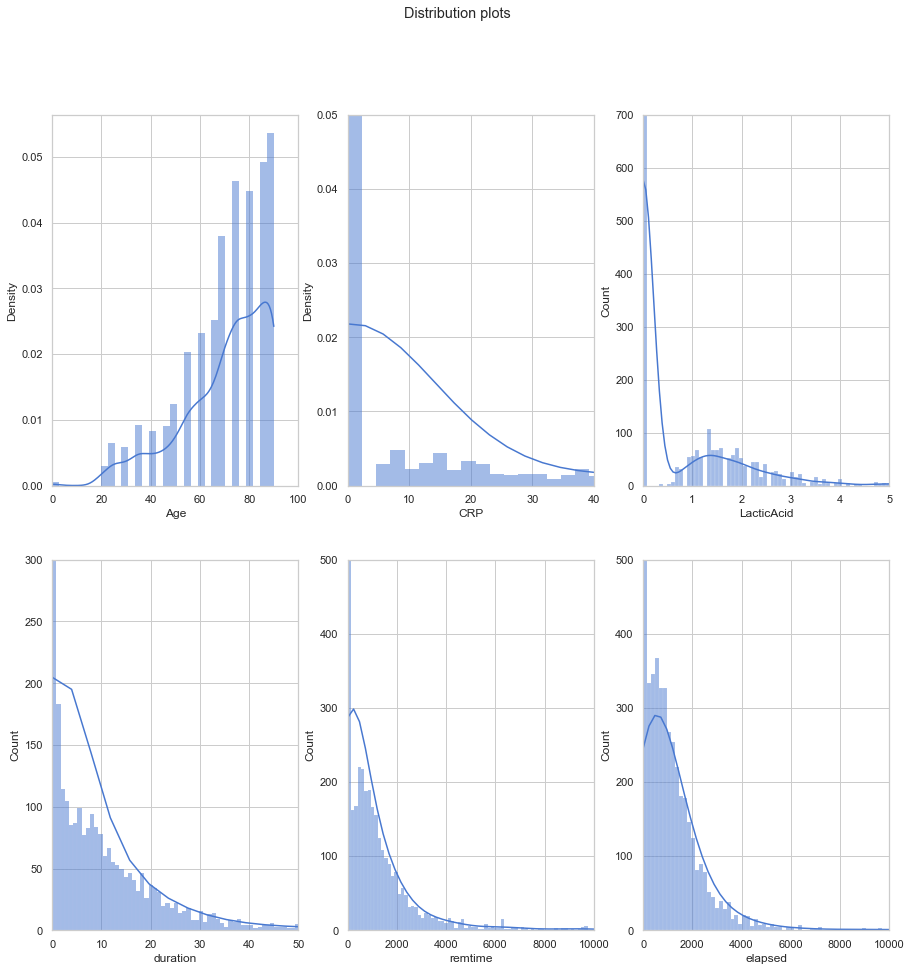

In [94]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display data types
data_types = dict(data_Sepsis.dtypes)
data_types = pd.DataFrame.from_dict(data_types, orient='index', columns=['data type'])
display(data_types)

# Distribution of float variables
sns.set(style="whitegrid", palette="muted")

# Define figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
fig.suptitle('Distribution plots')

# First row in figure
sns.histplot(data_Sepsis['Age'], kde=True, ax=axes[0, 0], stat="density", linewidth=0)
sns.histplot(data_Sepsis['CRP'],kde=True, ax=axes[0, 1], stat="density", linewidth=0)
sns.histplot(data_Sepsis['LacticAcid'], kde=True, ax=axes[0, 2])

# Second row in figure
sns.histplot(data_Sepsis['duration'], kde=True, ax=axes[1, 0])
sns.histplot(data_Sepsis['remtime'], kde=True, ax=axes[1, 1])
sns.histplot(data_Sepsis['elapsed'], kde=True, ax=axes[1, 2])

# Resetting the axis so the information is visible
axes[0, 0].set_xlim(0, 100)
axes[0, 1].set_xlim(0, 40)
axes[0, 1].set_ylim(0, 0.05)
axes[0, 2].set_xlim(0, 5)
axes[0, 2].set_ylim(0, 700)
axes[1, 0].set_xlim(0, 50)
axes[1, 0].set_ylim(0, 300)
axes[1, 1].set_xlim(0, 10000)
axes[1, 1].set_ylim(0, 500)
axes[1, 2].set_xlim(0, 10000)
axes[1, 2].set_ylim(0, 500)

plt.show()

# Correlation plot between all dimensions
fig = px.imshow(data_Sepsis.corr(), title="Correlation plot")
fig.show()

### 1.2 Data cleaning

You have now gathered some information about the data during the data exploration task. You also know from the assignment description that you will be using regression trees and kNN regression models to predict the remaining time.

Based on the above information, decide on which cleaning steps you will need to perform and implement them accordingly.


In [97]:
data_Sepsis.shape

(5176, 37)

In [98]:
# Remove rows with empty cells
data_Sepsis.dropna()

,DiagnosticArtAstrup,DiagnosticBlood,DiagnosticECG,DiagnosticIC,DiagnosticLacticAcid,DiagnosticLiquor,DiagnosticOther,DiagnosticSputum,DiagnosticUrinaryCulture,DiagnosticUrinarySediment,...,CRP,LacticAcid,Leucocytes,Complete Timestamp,duration,month,weekday,hour,remtime,elapsed
0,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,9.6,2014-10-22 19:34:00,0.383333,10,2,19,0.0,1099.0
1,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,9.6,2014-10-22 19:33:37,6.616667,10,2,19,23.0,1076.0
2,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,9.6,2014-10-22 19:27:00,0.000000,10,2,19,420.0,679.0
3,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,0.0,2014-10-22 19:27:00,0.000000,10,2,19,420.0,679.0
4,True,True,True,True,True,False,False,False,True,True,...,0.0,2.2,0.0,2014-10-22 19:27:00,11.316667,10,2,19,420.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171,False,True,True,True,True,False,False,False,True,True,...,0.0,2.6,12.5,2014-11-13 02:07:00,0.000000,11,3,2,0.0,1950.0
5172,False,True,True,True,True,False,False,False,True,True,...,0.0,2.6,0.0,2014-11-13 02:07:00,17.183333,11,3,2,0.0,1950.0
5173,False,True,True,True,True,False,False,False,True,True,...,0.0,0.0,0.0,2014-11-13 01:49:49,0.200000,11,3,1,1031.0,919.0
5174,False,True,True,True,True,False,False,False,True,True,...,0.0,0.0,0.0,2014-11-13 01:49:37,15.116667,11,3,1,1043.0,907.0


In [ ]:
# Install pm4py library using pip install -U pm4py
import pm4py

# Fill in the column names of case id, activity, and time stamps
column_Sepsis_CaseID = 'Case ID' 
column_Sepsis_Activity = 'Activity'
column_Sepsis_Timestamps = 'Complete Timestamp'

data_Sepsis[column_Sepsis_CaseID] = data_Sepsis[column_Sepsis_CaseID].astype(str)

# Convert the data to an event log
log_Sepsis = pm4py.format_dataframe(data_Sepsis, case_id=column_Sepsis_CaseID, activity_key=column_Sepsis_Activity, timestamp_key=column_Sepsis_Timestamps)

# Set the log to be the one that you are interested
log = log_Sepsis

# Create a Directly-Follows Graph (DFG) and plot this graph
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

# Discover a Process Model using Inductive Miner and plot this BPMN model
process_tree = pm4py.discover_tree_inductive(log)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

## 2. Preprocessing and Trace Encoding


### 2.1 Trace Encoding


- Implement the last-2-state encoding for the data set 
- Implement the aggregated encoding for the data set (for example, see [1], Table 6)


<span style="color:gray">[1] Ilya Verenich, Marlon Dumas, Marcello La Rosa, Fabrizio Maria Maggi, Irene Teinemaa:
Survey and Cross-benchmark Comparison of Remaining Time Prediction Methods in Business Process Monitoring. ACM Trans. Intell. Syst. Technol. 10(4): 34:1-34:34 (2019) [Section 1, 2, 4.1, 4.3, 4.6, 5.2, 5.3, 5.4, and 6] </span>

These two encodings are discussed during lecture 7.
In case you find difficult to implement the algorithms, you may also consider use the pandas functions to help you:
- for the last-2-state encoding, check the pandas groupby.DataFrameGroupBy.shift and see the [answer on the stake overflow](https://stackoverflow.com/questions/53335567/use-pandas-shift-within-a-group)
- for the aggregated encoding check the pandas groupby.DataFrameGroupBy and cumsum function and read the [examples and answers on the stake overflow](https://stackoverflow.com/a/49578219)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Data transformation
exclude = ['Case ID', 'Activity', 'remtime']
categorical_values = data_Sepsis[data_Sepsis.columns.difference(exclude)].select_dtypes(include=['object']).columns
dimensions = data_Sepsis[data_Sepsis.columns.difference(exclude)].columns

# Transform categorical labels
for col in categorical_values:
    data_Sepsis[col] = LabelEncoder().fit_transform(data_Sepsis[col])

# Normalize columns
data_Sepsis[dimensions] = MinMaxScaler().fit_transform(data_Sepsis[dimensions])

In [4]:
def last_2_state_encoding(_data, columnCase: str, columnActivity: str):
    """
    This function returns a trace encoded dataframe using last 2 state encoding.
    It does this by executing the following steps:
    1. Loop through the cases in the dataframe
    2. Sort the dataframe based on remaining time
    3. Add a previous state column to the dataframe
    4. Use one-hot-encoding for the columns
    """
    new_log = pd.DataFrame()
    for idx, df in _data.groupby(columnCase):
        df = df.sort_values('remtime', ascending=False)
        df['prev_state'] = df[columnActivity].shift()
        dummies = pd.get_dummies(df[[columnActivity, 'prev_state']], drop_first=True)
        df = df.join(dummies).drop([columnActivity, 'prev_state'], axis=1)
        new_log = pd.concat([new_log, df])
    new_log.index = new_log[columnCase]
    new_log = new_log.drop(columnCase, axis=1)
    new_log.fillna(0, inplace=True)
    return new_log

def agg_state_encoding(_data, columnCase: str, columnActivity: str):
    """
    This function returns a trace encoded dataframe using aggregated state encoding.
    It does this by executing the following steps:
    1. Loop through the cases in the dataframe
    2. Sort the dataframe based on remaining time
    3. One-hot-encode the activities
    4. Calculate the cumulative sum per activity
    """
    new_log = pd.DataFrame()
    for idx, df in _data.groupby(columnCase):
        df = df.sort_values('remtime', ascending=False)
        log = df[df.columns.difference([columnActivity])].copy()
        dummies = pd.get_dummies(df[columnActivity], drop_first=True)
        for activity in dummies.columns:
            log[activity] = dummies[activity].cumsum()
        new_log = pd.concat([new_log, log])
    new_log.index = new_log[columnCase]
    new_log = new_log.drop(columnCase, axis=1)
    new_log.fillna(0, inplace=True)
    return new_log

In [5]:
# For each of the two data sets, create a last_2_state encoding and an aggregated state encoding
data_Sepsis_ls = last_2_state_encoding(data_Sepsis, 'Case ID', 'Activity')
data_Sepsis_ag = agg_state_encoding(data_Sepsis, 'Case ID', 'Activity')

### 2.2 Create Training and Held-out test data sets


Create a training and a held-out test data set. *Later in Task 3-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data. Furthermore, how did you split the data? Motivate your choice when you discuss the experiment setup in your report. 

In [6]:
from sklearn.model_selection import train_test_split

# Create training data and held-out test data for *data_Sepsis_ls*
X_train_ls,  X_test_ls, y_train_ls, y_test_ls = train_test_split(
    data_Sepsis_ls.drop('remtime', axis=1),
    data_Sepsis_ls['remtime'],
    test_size=0.33, random_state=42
)

# Create training data and held-out test data for *data_Sepsis_ag*
X_train_ag, X_test_ag, y_train_ag, y_test_ag = train_test_split(
    data_Sepsis_ag.drop('remtime', axis=1),
    data_Sepsis_ag['remtime'],
    test_size=0.33, random_state=42
)

## 3. Predicting Case Remaining Time - Regression Trees


In this task, you will use the regression tree (or random forest regression if you prefer) to learn a regression model to predict case remaining time. Very similar to how you have trained a classification model in Assignment 1, now perform the following steps to train a regression model. 

i) use the default values for the parameters to get a [Regression Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) (or a [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) running on the training data. (*Optional: visualize the tree, the feature importance, and compute the error measures to get an impression of the performance of the model*).

ii) use 10-fold cross-validation to determine a possibly better choice for the two parameters *min_samples_leaf* and *max_depth*
    
iii) create 2D or 3D plot that shows how the selected parameters affect the performance. 

iv) select the best-performing regression tree (or forest), i.e., the one that achieved the lowest cross-validated errors, and report all the error measures (MAE, MSE, RMSE, R^2) of the fitted model on the held-out test data. 

## Default decision tree

The MAE for the last_2_state encoded dataframe with the default decision tree model is: 1293.7998829724986
The MAE for the agregate encoded dataframe with the default decision tree model is: 1016.0830895260386


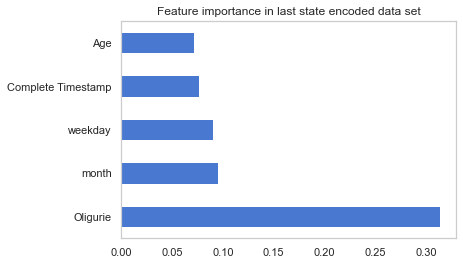

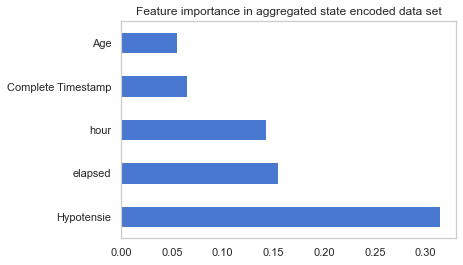

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Train a default model
regressor_ls = DecisionTreeRegressor().fit(X_train_ls, y_train_ls)
regressor_ag = DecisionTreeRegressor().fit(X_train_ag, y_train_ag)

# Calculate the mean absolute error per regressor
mae_ls = mean_absolute_error(y_test_ls, regressor_ls.predict(X_test_ls))
mae_ag = mean_absolute_error(y_test_ag, regressor_ag.predict(X_test_ag))

# Print the result
print("The MAE for the last_2_state encoded dataframe with the default decision tree model is: {}".format(mae_ls))
print("The MAE for the agregate encoded dataframe with the default decision tree model is: {}".format(mae_ag))

# Grab feature importance value from last state model
feature_importances = regressor_ls.feature_importances_
features = pd.Series(feature_importances, index=X_train_ls.columns)
top_features = features.nlargest(5)
top_features.plot(kind='barh', title='Feature importance in last state encoded data set', grid=False)
plt.show()

# Grab feature importance value from aggregated state model
feature_importances = regressor_ag.feature_importances_
features = pd.Series(feature_importances, index=X_train_ag.columns)
top_features = features.nlargest(5)
top_features.plot(kind='barh', title='Feature importance in aggregated state encoded data set', grid=False)
plt.show()

## Decision tree regression with Last-2-State Encoding


The optimal parameters based on MAE is:
max_depth: 4 
min_samples_leaf: 1


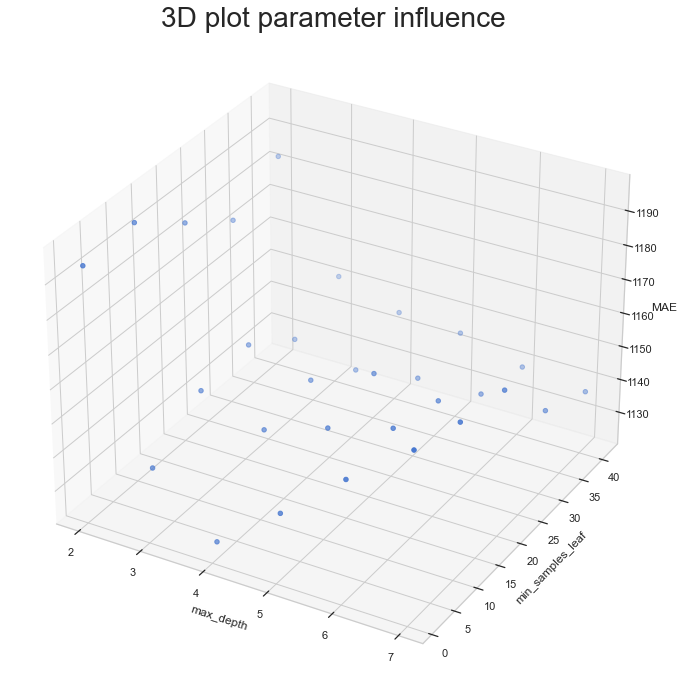



The performance of the model on the heldout data is: 
MSE: 7607167.0339785945
r2_score: 0.3363552543649587
MAE: 1116.2492593470517
RMSE: 7607167.0339785945


In [88]:
# Import packages
import plotly.express as px
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import KFold
import plotly.graph_objects as go

# Define the K folds
nk = 10
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Set the search space of the parameters min_samples_leaf and max_depth
max_depths_range = np.arange(2, 8)
samples_leaf_range = np.arange(1, 50, 10)

# Set the grid to save MAE for each parameter combination
training_MAE = np.zeros((nk , len(max_depths_range), len(samples_leaf_range)))
test_MAE = np.zeros((nk , len(max_depths_range), len(samples_leaf_range)))

# Loop through parameter ranges and calculate MAE
i = 0 # KFold counter
for train_index , val_index in kf.split(X_train_ls):
    X_t, X_val = X_train_ls.iloc[train_index], X_train_ls.iloc[val_index]
    y_t, y_val = y_train_ls.iloc[train_index], y_train_ls.iloc[val_index]
    j = 0 # max_depth counter
    for depth in max_depths_range:
        k = 0 # min_samples counter
        for samples in samples_leaf_range:
            # Train the decision tree with the parameter combination
            dtree_clf = DecisionTreeRegressor(min_samples_leaf=samples, max_depth=depth)
            dtree_clf.fit(X_t, y_t)
            # Calculate the MAE on the validation data
            y_pred = dtree_clf.predict(X_val)
            training_MAE[i][j][k] = mean_absolute_error(y_val, y_pred)
            # Make predictions for the test data
            test_prediction = dtree_clf.predict(X_test_ls)
            test_MAE[i][j][k] = mean_absolute_error(y_test_ls, test_prediction)
            k += 1
        j += 1
    i += 1

# Get the index of the highest MAE from the MAE grid and translate it to optimal parameters
depth_index, samples_index = list(np.unravel_index(np.argmin(np.mean(training_MAE, axis=0)), np.array(training_MAE).shape))[1:]
best_max_depth, best_sample_leafs = max_depths_range[depth_index], samples_leaf_range[samples_index]

print(
    '\n\033[1m' + 'The optimal parameters based on MAE is:' + '\033[0m' + '\nmax_depth: {} \nmin_samples_leaf: {}'
    .format(
        best_max_depth,
        best_sample_leafs
    ))

# Plot 2d graph showing the influence of max_depth on training and testing MAE
fig = go.Figure()
fig.add_trace(go.Scatter(x=max_depths_range, y=np.mean(np.mean(training_MAE , axis = 0), axis=1), mode='lines+markers', name='Train')) 
fig.add_trace(go.Scatter(x=max_depths_range, y=np.mean(np.mean(test_MAE , axis = 0), axis=1), mode='lines+markers', name='Test'))
fig.update_layout(
    title="2D plot parameter influence - last-2-state encoding",
    xaxis_title="max_depth Decision tree",
    yaxis_title="MAE"
)
fig.show()

# Create a dataframe of the cross validated accuracies based on parameter combinations
plotting_data = pd.DataFrame(data={
    'max_depth': [depth for depth in max_depths_range for n_leaf in range(len(samples_leaf_range))],
    'min_samples_leaf': np.tile(samples_leaf_range, len(max_depths_range)),
    'MAE': np.mean(training_MAE, axis=0).flatten(), # Take mean f1 of cross validations and flatten it
})

# Create 3D plot to show how the selected parameters affect the performance
fig = plt.figure(figsize=(16, 12))
plot = fig.add_subplot(projection='3d')
plot.scatter(plotting_data['max_depth'], plotting_data['min_samples_leaf'], plotting_data['MAE'])
plot.set_xlabel('max_depth')
plot.set_ylabel('min_samples_leaf')
plot.set_zlabel('MAE')
plt.title(label="3D plot parameter influence", fontsize=28)
plt.show()

# Compute the performance of the model on your held-out test data
prediction = DecisionTreeRegressor(min_samples_leaf=best_sample_leafs, max_depth=best_max_depth).fit(X_train_ls, y_train_ls).predict(X_test_ls)

print(
    '\n\033[1m' +'\nThe performance of the model on the heldout data is:' + '\033[0m' +' \nMSE: {}\nr2_score: {}\nMAE: {}\nRMSE: {}'
    .format(
        mean_squared_error(y_test_ls, prediction),
        r2_score(y_test_ls, prediction),
        mean_absolute_error(y_test_ls, prediction),
        mean_squared_error(y_test_ls, prediction, squared=True)
    )
)

## Decision tree regression with Aggregate-State Encoding


The optimal parameters based on MAE is:
max_depth: 7 
min_samples_leaf: 1


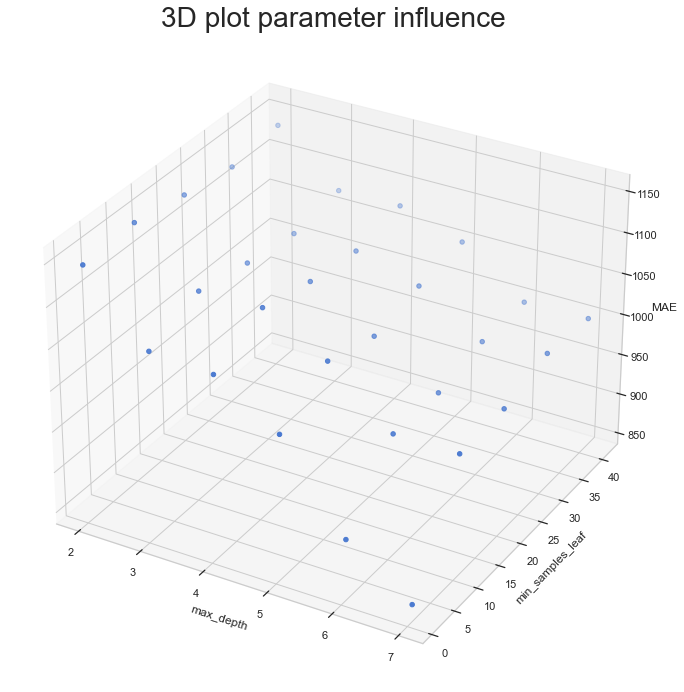



The performance of the model on the heldout data is: 
MSE: 10130595.474537069
r2_score: 0.11621285206426935
MAE: 910.5696355469248
RMSE: 10130595.474537069


In [41]:
# Define the K folds
nk = 10
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Set the search space of the parameters min_samples_leaf and max_depth
max_depths_range = np.arange(2, 8)
samples_leaf_range = np.arange(1, 50, 10)

# Set the grid to save MAE for each parameter combination
training_MAE = np.zeros((nk , len(max_depths_range), len(samples_leaf_range)))
test_MAE = np.zeros((nk , len(max_depths_range), len(samples_leaf_range)))

# Loop through parameter ranges and calculate MAE
i = 0 # KFold counter
for train_index , val_index in kf.split(X_train_ag):
    X_t, X_val = X_train_ag.iloc[train_index], X_train_ag.iloc[val_index]
    y_t, y_val = y_train_ag.iloc[train_index], y_train_ag.iloc[val_index]
    j = 0 # max_depth counter
    for depth in max_depths_range:
        k = 0 # min_samples counter
        for samples in samples_leaf_range:
            # Train the decision tree with the parameter combination
            dtree_reg = DecisionTreeRegressor(min_samples_leaf=samples, max_depth=depth)
            dtree_reg.fit(X_t, y_t)
            # Calculate the MAE on the validation data
            y_pred = dtree_reg.predict(X_val)
            training_MAE[i][j][k] = mean_absolute_error(y_val, y_pred)
            # Make predictions for the test data
            test_prediction = dtree_reg.predict(X_test_ag)
            test_MAE[i][j][k] = mean_absolute_error(y_test_ag, test_prediction)
            k += 1
        j += 1
    i += 1

# Get the index of the highest MAE from the MAE grid and translate it to optimal parameters
depth_index, samples_index = list(np.unravel_index(np.argmin(np.mean(training_MAE, axis=0)), np.array(training_MAE).shape))[1:]
best_max_depth, best_sample_leafs = max_depths_range[depth_index], samples_leaf_range[samples_index]

print(
    '\n\033[1m' + 'The optimal parameters based on MAE is:' + '\033[0m' + '\nmax_depth: {} \nmin_samples_leaf: {}'
    .format(
        best_max_depth,
        best_sample_leafs
    ))

# Plot 2d graph showing the influence of max_depth on training and testing MAE
fig = go.Figure()
fig.add_trace(go.Scatter(x=max_depths_range, y=np.mean(np.mean(training_MAE , axis = 0), axis=1), mode='lines+markers', name='Train')) 
fig.add_trace(go.Scatter(x=max_depths_range, y=np.mean(np.mean(test_MAE , axis = 0), axis=1), mode='lines+markers', name='Test'))
fig.update_layout(
    title="2D plot parameter influence - aggregate-state encoding",
    xaxis_title="max_depth Decision tree",
    yaxis_title="MAE"
)
fig.show()

# Create a dataframe of the cross validated accuracies based on parameter combinations
plotting_data = pd.DataFrame(data={
    'max_depth': [depth for depth in max_depths_range for n_leaf in range(len(samples_leaf_range))],
    'min_samples_leaf': np.tile(samples_leaf_range, len(max_depths_range)),
    'MAE': np.mean(training_MAE, axis=0).flatten(), # Take mean f1 of cross validations and flatten it
})

# Create 3D plot to show how the selected parameters affect the performance
fig = plt.figure(figsize=(16, 12))
plot = fig.add_subplot(projection='3d')
plot.scatter(plotting_data['max_depth'], plotting_data['min_samples_leaf'], plotting_data['MAE'])
plot.set_xlabel('max_depth')
plot.set_ylabel('min_samples_leaf')
plot.set_zlabel('MAE')
plt.title(label="3D plot parameter influence", fontsize=28)
plt.show()

# Compute the performance of the model on your held-out test data
prediction = DecisionTreeRegressor(min_samples_leaf=best_sample_leafs, max_depth=best_max_depth).fit(X_train_ag, y_train_ag).predict(X_test_ag)

print(
    '\n\033[1m' +'\nThe performance of the model on the heldout data is:' + '\033[0m' +' \nMSE: {}\nr2_score: {}\nMAE: {}\nRMSE: {}'
    .format(
        mean_squared_error(y_test_ag, prediction),
        r2_score(y_test_ag, prediction),
        mean_absolute_error(y_test_ag, prediction),
        mean_squared_error(y_test_ag, prediction, squared=True)
    )
)

## 4. Predicting Case Remaining Time - kNN Regression


In this task, you will use the kNN Regression to learn a regression model to predict case remaining time. The same as task 3, now perform the following steps to train a regression model. 

i) use the default values for the parameters to get a [kNN Regression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) running on the training data. (*Optional: compute the error measures to get an impression of the performance of the model).

ii) use 10-fold cross-validation to determine a possibly better choice for the two parameters *n_neighbors* and *weights* 
    
iii) create 2D or 3D plot that shows how the selected parameters affect the performance. 

iv) select the best-performing kNN, i.e., the one that achieved the lowest cross-validated errors, and report all the error measures (MAE, MSE, RMSE, R^2) of the fitted model on the held-out test data. 


## Default KNN regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Train a default model
regressor_ls = KNeighborsRegressor().fit(X_train_ls, y_train_ls)
regressor_ag = KNeighborsRegressor().fit(X_train_ag, y_train_ag)

# Calculate the mean absolute error per regressor
mae_ls = mean_absolute_error(y_test_ls, regressor_ls.predict(X_test_ls))
mae_ag = mean_absolute_error(y_test_ag, regressor_ag.predict(X_test_ag))

# Print the result
print("The MAE for the last_2_state encoded dataframe with the default decision tree model is: {}".format(mae_ls))
print("The MAE for the agregate encoded dataframe with the default decision tree model is: {}".format(mae_ag))

The MAE for the last_2_state encoded dataframe with the default decision tree model is: 1099.437682855471
The MAE for the agregate encoded dataframe with the default decision tree model is: 913.4981860737274


## KNN regression with last-2-state encoding

In [91]:
# Import packages
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the K folds
nk = 5
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Set the search space of the parameters min_samples_leaf and max_depth
n_neighbours_range = np.arange(1, 25, 2)

# Set the grid to save MAE for each parameter combination
training_MAE = np.zeros((nk , len(n_neighbours_range)))
test_MAE = np.zeros((nk , len(n_neighbours_range)))

# Loop through parameter ranges and calculate MAE
i = 0 # KFold counter
for train_index , val_index in kf.split(X_train_ls):
    X_t, X_val = X_train_ls.iloc[train_index], X_train_ls.iloc[val_index]
    y_t, y_val = y_train_ls.iloc[train_index], y_train_ls.iloc[val_index]
    j = 0 # n_neighbour counter
    for n_neigbour in n_neighbours_range:
        knn_reg = KNeighborsRegressor(n_neighbors=n_neigbour, weights='distance')
        knn_reg.fit(X_t, y_t)
        # Calculate the MAE on the validation data
        y_pred = knn_reg.predict(X_val)
        training_MAE[i][j] = mean_absolute_error(y_val, y_pred)
        # Make predictions for the test data
        test_prediction = knn_reg.predict(X_test_ls)
        test_MAE[i][j] = mean_absolute_error(y_test_ls, test_prediction)
        j += 1
    i += 1

# Get the index of the highest MAE from the MAE grid and translate it to optimal parameter
neighbour_index = list(np.unravel_index(np.argmin(np.mean(training_MAE, axis=0)), np.array(training_MAE).shape))[1]
best_n_neighbours = n_neighbours_range[neighbour_index]

print('\n\033[1m' + 'The optimal parameter based on MAE is:' + '\033[0m' + '\nn_neighbours: {}'.format(best_n_neighbours))

# Plot 2d graph showing the influence of n_neighbours on training and testing MAE
fig = go.Figure()
fig.add_trace(go.Scatter(x=n_neighbours_range, y=np.mean(training_MAE , axis = 0), mode='lines+markers', name='Validation')) 
fig.add_trace(go.Scatter(x=n_neighbours_range, y=np.mean(test_MAE , axis = 0), mode='lines+markers', name='Test'))
fig.update_layout(
    title="2D plot parameter influence - last_2_state encoding",
    xaxis_title="n_neighbours kNN",
    yaxis_title="MAE"
)
fig.show()

# Compute the performance of the model on your held-out test data
prediction = KNeighborsRegressor(n_neighbors=best_n_neighbours).fit(X_train_ls, y_train_ls).predict(X_test_ls)

print(
    '\n\033[1m' +'\nThe performance of the model on the heldout data is:' + '\033[0m' +' \nMSE: {}\nr2_score: {}\nMAE: {}\nRMSE: {}'
    .format(
        mean_squared_error(y_test_ls, prediction),
        r2_score(y_test_ls, prediction),
        mean_absolute_error(y_test_ls, prediction),
        mean_squared_error(y_test_ls, prediction, squared=True)
    )
)


The optimal parameter based on MAE is:
n_neighbours: 29




The performance of the model on the heldout data is: 
MSE: 7944082.568162259
r2_score: 0.3069629427481503
MAE: 1067.6119125925627
RMSE: 7944082.568162259


## KNN regression with aggregate-state encoding

In [92]:
# Define the K folds
nk = 5
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Set the search space of the parameters min_samples_leaf and max_depth
n_neighbours_range = np.arange(1, 25, 2)

# Set the grid to save MAE for each parameter combination
training_MAE = np.zeros((nk , len(n_neighbours_range)))
test_MAE = np.zeros((nk , len(n_neighbours_range)))

# Loop through parameter ranges and calculate MAE
i = 0 # KFold counter
for train_index , val_index in kf.split(X_train_ag):
    X_t, X_val = X_train_ag.iloc[train_index], X_train_ag.iloc[val_index]
    y_t, y_val = y_train_ag.iloc[train_index], y_train_ag.iloc[val_index]
    j = 0 # n_neighbors counter
    for n_neigbour in n_neighbours_range:
        knn_reg = KNeighborsRegressor(n_neighbors=n_neigbour, weights='distance')
        knn_reg.fit(X_t, y_t)
        # Calculate the MAE on the validation data
        y_pred = knn_reg.predict(X_val)
        training_MAE[i][j] = mean_absolute_error(y_val, y_pred)
        # Make predictions for the test data
        test_prediction = knn_reg.predict(X_test_ag)
        test_MAE[i][j] = mean_absolute_error(y_test_ag, test_prediction)
        j += 1
    i += 1

# Get the index of the highest MAE from the MAE grid and translate it to optimal parameter
neighbour_index = list(np.unravel_index(np.argmin(np.mean(training_MAE, axis=0)), np.array(training_MAE).shape))[1]
best_n_neighbours = n_neighbours_range[neighbour_index]

print('\n\033[1m' + 'The optimal parameter based on MAE is:' + '\033[0m' + '\nn_neighbours: {}'.format(best_n_neighbours))

# Plot 2d graph showing the influence of n_neighbors on training and testing MAE
fig = go.Figure()
fig.add_trace(go.Scatter(x=n_neighbours_range, y=np.mean(training_MAE , axis = 0), mode='lines+markers', name='Validation')) 
fig.add_trace(go.Scatter(x=n_neighbours_range, y=np.mean(test_MAE , axis = 0), mode='lines+markers', name='Test'))
fig.update_layout(
    title="2D plot parameter influence - aggregate-state encoding",
    xaxis_title="n_neighbours kNN",
    yaxis_title="MAE"
)
fig.show()

# Compute the performance of the model on your held-out test data
prediction = KNeighborsRegressor(n_neighbors=best_n_neighbours).fit(X_train_ag, y_train_ag).predict(X_test_ag)

print(
    '\n\033[1m' +'\nThe performance of the model on the heldout data is:' + '\033[0m' +' \nMSE: {}\nr2_score: {}\nMAE: {}\nRMSE: {}'
    .format(
        mean_squared_error(y_test_ag, prediction),
        r2_score(y_test_ag, prediction),
        mean_absolute_error(y_test_ag, prediction),
        mean_squared_error(y_test_ag, prediction, squared=True)
    )
)


The optimal parameter based on MAE is:
n_neighbours: 29




The performance of the model on the heldout data is: 
MSE: 7197925.598875367
r2_score: 0.37205723473285357
MAE: 929.5635277738544
RMSE: 7197925.598875367


## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Implement or use another regression algorithm (for example, [Random Forest Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), [LinearRegresion](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [SVM Regression](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)) or design your own algorithm that achieves a better MAE measure. Explain this in your report.
2. Implement techniques (e.g., preprocessing, feature engineering, feature selection, sampling) that help improve the MAE scores of existing models. For example, try out a feature selection for kNN or implement inter-case features. Explain this in your report.



## Random forest regressor with default parameters

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold

# Make predictions with default model
regmodel_ls_pred = RandomForestRegressor().fit(X_train_ls, y_train_ls).predict(X_test_ls)
regmodel_ag_pred = RandomForestRegressor().fit(X_train_ag, y_train_ag).predict(X_test_ag)

print(
    "The performance of the default random forest regressor on the last_2_state data is: {}"
    .format(
        mean_absolute_error(y_test_ls, regmodel_ls_pred),
        mean_squared_error(y_test_ls, regmodel_ls_pred),
        r2_score(y_test_ls, regmodel_ls_pred)
    )
)

print(
    "The performance of the default random forest regressor on the aggregated state data is: {}"
    .format(
        mean_absolute_error(y_test_ls, regmodel_ag_pred),
        mean_squared_error(y_test_ls, regmodel_ag_pred),
        r2_score(y_test_ls, regmodel_ag_pred)
    )
)

The performance of the default random forest regressor on the last_2_state data is: 1084.214476301931, 
The performance of the default random forest regressor on the aggregated state data is: 851.8411878291399, 


## Random forest on last_2_state encoding

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter search spaces and parameter grid
param_grid = dict(
    n_estimators=np.arange(50, 150, 10),
    min_samples_split=np.arange(2,5),
    min_samples_leaf=np.arange(1,5),
    max_depth=np.arange(3, 10)
)

# Search for the best parameter combination
model_type = RandomForestRegressor()
grid_search = RandomizedSearchCV(model_type, param_grid, cv=5, random_state=10, n_jobs=-1)
best_params = grid_search.fit(X_train_ls, y_train_ls).best_params_

# Train a model with the optimal parameters
regmodel_ls = RandomForestRegressor(
    n_estimators=best_params.get('n_estimators'),
    min_samples_split=best_params.get('min_samples_split'),
    min_samples_leaf=best_params.get('min_samples_leaf'),
    max_depth=best_params.get('max_depth')
).fit(X_train_ls, y_train_ls)

# Make predictions on the test data
y_pred_ls = regmodel_ls.predict(X_test_ls)

# Calculate performance metrics
print(
    "The performance of the random forest regressor on the last_2_state data is MAE: {}, MSE: {}, R2: {} "
    .format(
        mean_absolute_error(y_test_ls, y_pred_ls),
        mean_squared_error(y_test_ls, y_pred_ls),
        r2_score(y_test_ls, y_pred_ls)
    )
)

The performance of the random forest regressor on the last_2_state data is MAE: 1069.2379444413796, MSE: 7105739.90466949, R2: 0.3800994600854961 


## Random forest on aggregate state encoding

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter search spaces and parameter grid
param_grid = dict(
    n_estimators=np.arange(50, 150, 10),
    min_samples_split=np.arange(2,5),
    min_samples_leaf=np.arange(1,5),
    max_depth=np.arange(3, 10)
)

# Search for the best parameter combination
model_type = RandomForestRegressor()
grid_search = RandomizedSearchCV(model_type, param_grid, cv=5, random_state=10, n_jobs=-1)
best_params = grid_search.fit(X_train_ag, y_train_ag).best_params_

# Train a model with the optimal parameters
regmodel_ag = RandomForestRegressor(
    n_estimators=best_params.get('n_estimators'),
    min_samples_split=best_params.get('min_samples_split'),
    min_samples_leaf=best_params.get('min_samples_leaf'),
    max_depth=best_params.get('max_depth')
).fit(X_train_ag, y_train_ag)

# Make predictions on the test data
y_pred_ag = regmodel_ag.predict(X_test_ag)

# Calculate performance metrics
print(
    "The performance of the random forest regressor on the last_2_state data is MAE: {}, MSE: {}, R2: {} "
    .format(
        mean_absolute_error(y_test_ag, y_pred_ag),
        mean_squared_error(y_test_ag, y_pred_ag),
        r2_score(y_test_ag, y_pred_ag)
    )
)

The performance of the random forest regressor on the last_2_state data is MAE: 892.2231667065275, MSE: 5852285.738283163, R2: 0.48945005902739613 


## Feature optimization

<module 'matplotlib.pyplot' from '/Users/sjoerdvink/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

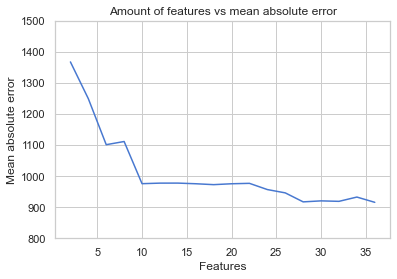

In [81]:
import matplotlib.pyplot as plt

# range for amount of features and steps that should be taken
best_features = pd.DataFrame(
    regmodel_ag.feature_importances_,
    index = X_train_ag.columns,
    columns=['importance']).sort_values('importance',
    ascending=False
)

def top_features(feature):
    """
    Train a Random forest regressor with the provided number of features
    """
    reg = RandomForestRegressor(
        n_estimators=best_params.get('n_estimators'),
        min_samples_split=best_params.get('min_samples_split'),
        min_samples_leaf=best_params.get('min_samples_leaf'),
        max_depth=best_params.get('max_depth')
    )
    reg.fit(X_train_ag[list(best_features.index[:feature])], y_train_ag)
    y_predict = reg.predict(X_test_ag[list(best_features.index[:feature])])
    return mean_absolute_error(y_test_ag, y_predict)

# Loop through the feature range
feature_range = list(range(2, len(best_features), 2))
mae_scores_reg = []
for n in feature_range:
    current_mae = top_features(n)
    mae_scores_reg.append(current_mae)

# Plot the result
plt.plot(feature_range, mae_scores_reg)
plt.ylim((800, 1500))
plt.xlabel("Features")
plt.ylabel("Mean absolute error")
plt.title("Amount of features vs mean absolute error")
plt